<a href="https://colab.research.google.com/github/NimrodDev/TensorFlow/blob/main/Q_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import gym
import numpy as np
import time

env = gym.make('FrozenLake-v1')
STATES = env.observation_space.n
ACTIONS = env.action_space.n

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [12]:
Q = np.zeros((STATES, ACTIONS)) # Create a matrix with all 0 values
Q

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [13]:
EPISODES = 10000 # How many times to run the environment from the begining
MAX_STEPS = 100 # Max number of steps allowed for each run of environment

LEARNING_RATE = 0.81 # Learning rate
GAMMA = 0.96

# **PICKING AN ACTION**

In [14]:
epsilon = 0.9 # Start with a 90% chance of picking a random action

# Code to pick action
if np.random.uniform(0, 1) < epsilon: # We will check if a randomly selected value is less than epsilon
    action = env.action_space.sample()# Take random action
else:
    action = np.argmax(Q[state, :]) # Use Q table to pick best action based on current values

In [ ]:
Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + GAMMA * np.max(Q[new_state, :])-Q[state, action])

In [18]:
import gym
import numpy as np
import time

env = gym.make('FrozenLake-v1')
STATES = env.observation_space.n
ACTIONS = env.action_space.n

Q = np.zeros((STATES, ACTIONS))

EPISODES = 1500 # How many times to run the environment from the beginning
MAX_STEPS = 100 # Max number of the steps allowed for each run of environment

LEARNING_RATE = 0.81 # Learning rate
GAMMA = 0.96

RENDER = False # If you want to see training, set render = True
epsilon = 0.9

In [19]:
rewards = []
for episode in range(EPISODES):
  state = env.reset()
  for _ in range(MAX_STEPS):
    if RENDER:
      env.render()
    if np.random.uniform(0, 1) < epsilon:
      action = env.action_space.sample()
    else:
      action = np.argmax(Q[state, :])

    next_state, reward, done, _ = env.step(action)

    Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + GAMMA * np.max(Q[next_state, :])-Q[state, action])

    state = next_state

    if done:
      rewards.append(reward)
      epsilon -= 0.001
      break # Reached goal

print(Q)
print(f"Average reward: {sum(rewards)/len(rewards)}:") # Now we can see our Q value

/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


[[4.42488767e-01 2.88614647e-02 3.04828222e-02 2.99967219e-02]
 [7.35749112e-03 5.63112926e-06 5.39403545e-07 2.56851106e-01]
 [1.52949079e-01 5.78378282e-03 9.91512775e-03 1.44769989e-02]
 [3.22636156e-03 7.04887513e-04 1.26518886e-02 1.50047735e-02]
 [5.28429796e-01 1.57011627e-02 1.80477251e-02 5.95945383e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.86292416e-04 1.18404261e-06 2.95516147e-02 6.76520901e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.60177994e-02 7.00395820e-03 6.43142349e-03 6.90341670e-01]
 [5.36857068e-03 7.35995071e-01 2.13249847e-02 1.39547643e-02]
 [2.60483904e-01 1.23174158e-03 1.60083460e-03 4.93966468e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.81311444e-02 2.38227130e-02 5.11107752e-01 6.81029390e-02]
 [1.38989913e-01 9.21799295e-01 1.65431343e-01 1.62937657e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.000000

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


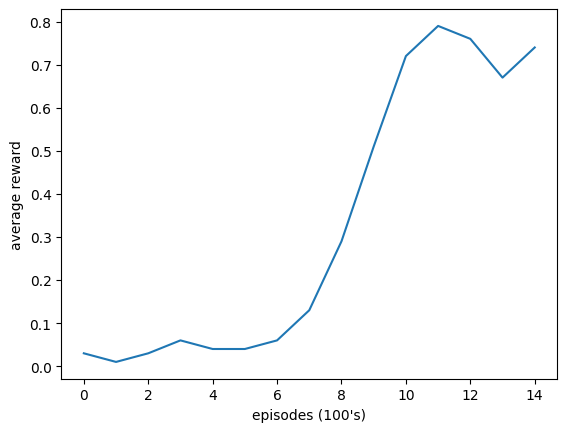

In [20]:
# We can plot the training progress and see how the agent improved
import matplotlib.pyplot as plt

def get_average(values):
  return sum(values)/len(values)

avg_rewards = []
for i in range(0, len(rewards), 100):
  avg_rewards.append(get_average(rewards[i:i+100]))

plt.plot(avg_rewards)
plt.ylabel('average reward')
plt.xlabel('episodes (100\'s)')
plt.show()